## 선형회귀분석 오류

In [2]:
# 곤충질량(g)에 따라 암수구분하는 모델 생성
# 0:암컷, 1:수컷

wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]
spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

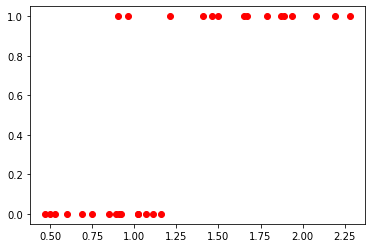

In [10]:
# 시각화
plt.plot(wght, spcs, 'ro')

In [11]:
# 선형회귀분석

lr = LinearRegression()
lr.fit(np.array(wght).reshape(-1,1), spcs)

LinearRegression()

In [12]:
lr.coef_, lr.intercept_

# 0.75, -0.43

(array([0.74825276]), -0.43007818056050295)

In [13]:
pred = lr.predict(np.array(wght).reshape(-1,1))

r2_score(spcs, pred)   # 0.61

0.6140660982944375

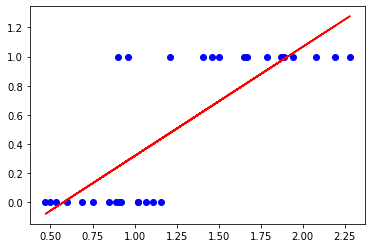

In [16]:
plt.plot(wght, spcs, 'bo')
plt.plot(wght, pred, 'r-')

## 종속변수가 범주형인 경우
* 선형방정식은 이항분포를 따르는 데이터에 적용하기에 다소 맞지 않음
   + $ y = ax + b $
* 즉, 우변값의 범위는 '-무한대~+무한대'이지만, 좌변값의 범위는 '0~1'임

* 따라서, 좌변값의 범위를 우변과 동일하게 '-무한대~+무한대'로 하려면 적절한 변환함수가 필요
    + 로짓함수를 이용해서 변환함
    + ### $  f(x) = \frac {1} {1 + e^{-x}} $

In [77]:
# 로짓함수 정의

def logistic(x, w):
    yy = 1 / (1 + np.exp(-(w[0]*x + w[1])))
    return yy

In [78]:
# 로짓함수를 이용해서 다시 그래프를 그림
W = [8, -10]  # 기울기와 절편을 임의로 설정
xx = np.linspace(0.5, 2.25, 50)  # 0.5~2.25내 50개 값생성
yy = logistic(xx, W)

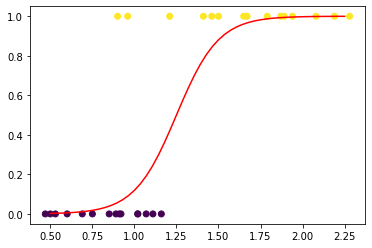

In [79]:
plt.scatter(pd.Series(wght), pd.Series(spcs), c=spcs)
plt.plot(xx.reshape(-1,1), yy, 'r-')

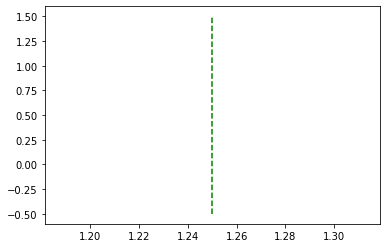

In [80]:
# 결정경계 표시 (yy가 0.5이상되는 지점 알아냄)
i = np.min( np.where(yy >= 0.5) )
xp = (xx[i])
plt.plot([xp,xp], [-.5,1.5], 'g--')

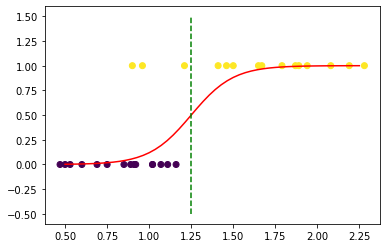

In [81]:
plt.scatter(pd.Series(wght), pd.Series(spcs), c=spcs)

plt.plot(xx.reshape(-1,1), yy, 'r-')

i = np.min( np.where(yy >= 0.5) )

xp = (xx[i])

plt.plot([xp,xp], [-.5,1.5], 'g--')

In [82]:
# sklearn에서 제공하는 LogisticRegression으로 분석하기

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [83]:
X = np.array(wght).reshape(-1,1)
y = spcs

In [ ]:
# solver : sklearn 20.x 이상부터는 명시적 지정 필요
# liblinear : 이항회귀, 비교적 작은 데이터셋에 적합 ( 0 또는 1 같은걸 분석할떄 )
# lbfgs, newton-cg : 다항회귀, L1제약
# sag, saga : 다항회귀, L2제약, 확률적경사하강법 사용
# multi_class = 'multinomial'  # 다항회귀 설정

In [89]:
lrclf = LogisticRegression(solver='liblinear')
lrclf.fit(X,y)
pred = lrclf.predict(X)

In [90]:
accuracy_score(y, pred)

0.8666666666666667

임계값 [1.25]


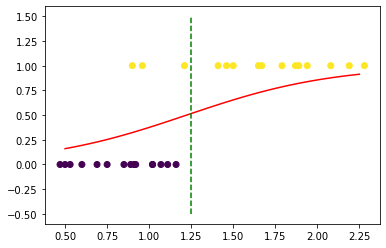

In [86]:
plt.scatter(X, y, c=y)
xx = np.linspace(0.5, 2.25, 50).reshape(-1,1)
yy = lrclf.predict_proba(xx)
plt.plot(xx, yy[:, 1], 'r-')

i = np.min(np.where(yy[:,1] >= 0.5))
xp = xx[i]
plt.plot([xp,xp], [-.5, 1.5], 'g--')
print('임계값', xp)

## iris 데이터셋을 이용한 로지스틱 회귀
* 4+1 변수, 150개 데이터로 구성
* 결과값은 3가지 : setosa, versicolor, verginica

In [116]:
# 꽃잎너비, 레이블이 verginica인 경우에 대한 경계값 알아보기

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [117]:
iris = load_iris()

In [122]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(iris.data, iris.target, test_size=0.3, stratify=iris.target, random_state=2111091510)

In [123]:
lrclf = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=0.1)

In [124]:
lrclf.fit(Xtrain, Ytrain)
pred = lrclf.predict(Xtest)

In [125]:
accuracy_score(Ytest,pred)

0.9777777777777777

In [127]:
X = iris.data[:,3] # petal width
y = (iris.target == 2).astype(np.int32)

In [128]:
np.min(X), np.max(X)
y[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [132]:
lrclf = LogisticRegression(solver='liblinear')
lrclf.fit(X.reshape(-1,1),y)

LogisticRegression(solver='liblinear')

임계값 [1.61616162]


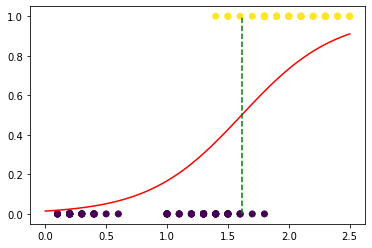

In [137]:
plt.scatter(X, y, c=y)
xx = np.linspace(0, 2.5, 100).reshape(-1,1)
yy = lrclf.predict_proba(xx)
plt.plot(xx,yy[:, 1],'r')

i = np.min (np.where(yy[:,1] >= 0.5))
xp = (xx[i])
plt.plot([xp,xp], [0,1], 'g--')

print('임계값', xp)

### 결정경계 시각화
* iris의 feature를 2개로 나눠 재학습

In [193]:
# 시각화를 위해 두 변수만 지정
data = iris.data[:, :2]  # sepal 속성만
#data = iris.data[:, 2:]  # petal 속성만

target = iris.target

In [194]:
# 분석시작
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data, target))  # 훈련 정확도

0.82


In [229]:
plt.rcParams['pcolor.shading'] = 'nearest'

In [230]:
# 다항 로지스틱 결정경계 시각화

x_min = data[:, 0].min() - 0.5   # x축 최대/최소 
x_max = data[:, 0].max() + 0.5

In [231]:
y_min = data[:, 1].min() - 0.5 # y축 최대/최소
y_max = data[:, 1].max() + 0.5

In [232]:
# x/y축 범위의 값들 생성

xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

In [233]:
# 생성한 값들을 x,y 쌍으로 좌표평면에 배치
# 즉, 예측값을 나타낼 데이터 범위 지정
xx, yy = np.meshgrid(xm,ym)

In [234]:
xx[:5]

array([[3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ],
       [3.8 , 3.82, 3.84, ..., 8.36, 8.38, 8.4 ]])

In [235]:
yy[:5]

array([[1.5 , 1.5 , 1.5 , ..., 1.5 , 1.5 , 1.5 ],
       [1.52, 1.52, 1.52, ..., 1.52, 1.52, 1.52],
       [1.54, 1.54, 1.54, ..., 1.54, 1.54, 1.54],
       [1.56, 1.56, 1.56, ..., 1.56, 1.56, 1.56],
       [1.58, 1.58, 1.58, ..., 1.58, 1.58, 1.58]])

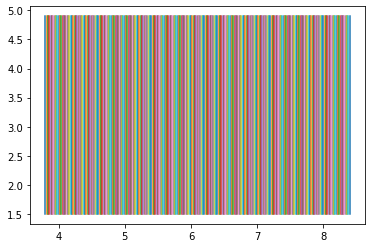

In [236]:
# 지금까지의 작업 확인
plt.plot(xx,yy)
plt.show()

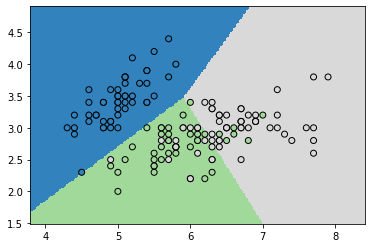

In [241]:
# 위에서 만든 x,y 좌표쌍을 모델을 통해 예측함

results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy, results, cmap=plt.cm.tab20c)



# 원본데이터를 산점도에 표시
plt.scatter(data[:,0],data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')

plt.show()

In [242]:
# 시각화를 위해 두 변수만 지정  (peral 계열)

# data = iris.data[:, :2]  # sepal 속성만
data = iris.data[:, 2:]  # petal 속성만

target = iris.target

In [243]:
# 분석시작
lrclf = LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data, target))  # 훈련 정확도

0.9666666666666667


In [244]:
plt.rcParams['pcolor.shading'] = 'nearest'

In [245]:
# 다항 로지스틱 결정경계 시각화

x_min = data[:, 0].min() - 0.5   # x축 최대/최소 
x_max = data[:, 0].max() + 0.5

In [246]:
y_min = data[:, 1].min() - 0.5 # y축 최대/최소
y_max = data[:, 1].max() + 0.5

In [247]:
# x/y축 범위의 값들 생성

xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

In [248]:
# 생성한 값들을 x,y 쌍으로 좌표평면에 배치
# 즉, 예측값을 나타낼 데이터 범위 지정
xx, yy = np.meshgrid(xm,ym)

In [249]:
xx[:5]

array([[0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38]])

In [251]:
yy[:5]

array([[-0.4 , -0.4 , -0.4 , ..., -0.4 , -0.4 , -0.4 ],
       [-0.38, -0.38, -0.38, ..., -0.38, -0.38, -0.38],
       [-0.36, -0.36, -0.36, ..., -0.36, -0.36, -0.36],
       [-0.34, -0.34, -0.34, ..., -0.34, -0.34, -0.34],
       [-0.32, -0.32, -0.32, ..., -0.32, -0.32, -0.32]])

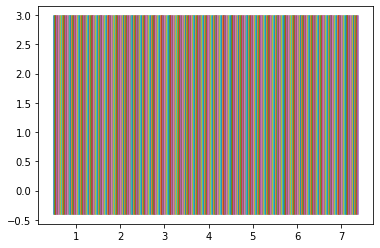

In [252]:
# 지금까지의 작업 확인
plt.plot(xx,yy)
plt.show()

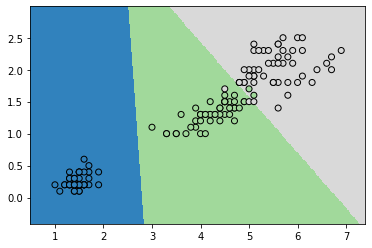

In [253]:
# 위에서 만든 x,y 좌표쌍을 모델을 통해 예측함

results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy, results, cmap=plt.cm.tab20c)



# 원본데이터를 산점도에 표시
plt.scatter(data[:,0],data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')

plt.show()

In [254]:
import mldlpy3

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


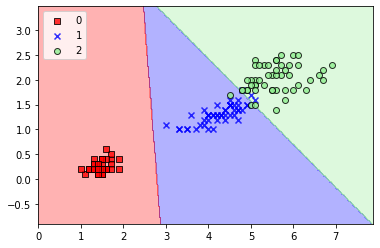

In [256]:
mldlpy3.plot_decision_regions(data, target, lrclf)